# Used Car Price Prediction

The second-hand car market has continued to expand even as the reduction in the market of new cars.The price of used cars depends on many factors like fuel type, colour, model, mileage,transmission, engine, number of seats etc..
The used cars price in the market will keep on changing. Thus the evaluation model to predict the price of the used cars is required.

## Problem Statement

In this project, we are going to proposed a predictive model using various regression model on our used car dataset to predict the prices of cars.

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [4]:
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0


In [5]:
y_train.head()
y_test.head()

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000


In [6]:
#Checking the shape of data
X_train.shape

(4960, 10)

In [7]:
#checking of null values
print(X_train.isnull().sum())

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [8]:
#Statistical data of our dataset
print(X_train.describe())

              carID         year        mileage          tax          mpg  \
count   4960.000000  4960.000000    4960.000000  4960.000000  4960.000000   
mean   15832.446169  2016.737903   24956.286895   152.332661    50.370766   
std     2206.717006     2.884035   24443.333662    82.403844    35.746505   
min    12002.000000  1997.000000       1.000000     0.000000     2.800000   
25%    13929.250000  2016.000000    5641.250000   145.000000    38.700000   
50%    15840.000000  2017.000000   19000.000000   145.000000    47.100000   
75%    17765.750000  2019.000000   36702.000000   150.000000    54.300000   
max    19629.000000  2020.000000  259000.000000   580.000000   470.800000   

        engineSize  
count  4960.000000  
mean      2.124375  
std       0.789368  
min       0.000000  
25%       1.600000  
50%       2.000000  
75%       2.800000  
max       6.600000  


In [9]:
X_train.drop('carID',axis=1,inplace=True)
y_train.drop('carID',axis=1,inplace=True)
X_test.drop('carID',axis=1,inplace=True)
y_test.drop('carID',axis=1,inplace=True)

# Checking and Handling Outliers

Using boxplot, we can check whether we have outliers or not.

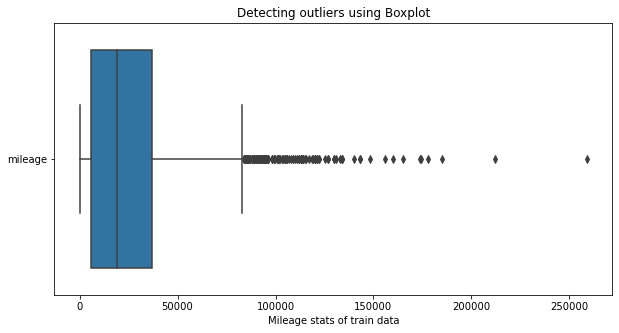

In [10]:
#boxplot
plt.figure(figsize=(10,5))
df1=X_train[['mileage']]
df2=X_train[['mpg']]
sns.boxplot(data=df1,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Mileage stats of train data')
plt.show()

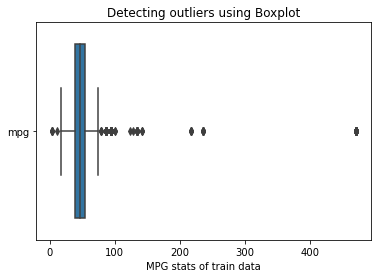

In [11]:
#boxplot for mpg
sns.boxplot(data=df2,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('MPG stats of train data')
plt.show()

## Using Inter Quartile Range (IQR)

Detecting the outliers using Inter Quartile Range(IQR).

In [12]:
#using iqr
#training dataset
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("The Val of Q1 and Q3 : ",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("The lower & Upper Bound : ",lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
outliers_mileage = detect_outliers_iqr(X_train['mileage'])
outliers_mpg = detect_outliers_iqr(X_train['mpg'])
print("Number of outliers in mileage in our training dataset : ",len(outliers_mileage))
print("Number of outliers in mpg in our training dataset : ",len(outliers_mpg))

The Val of Q1 and Q3 :  5641.25 36702.0
The lower & Upper Bound :  -40949.875 83293.125
The Val of Q1 and Q3 :  38.7 54.3
The lower & Upper Bound :  15.300000000000011 77.69999999999999
Number of outliers in mileage in our training dataset :  289
Number of outliers in mpg in our training dataset :  289


Now that, we got the outliers.
We are going to handle Outliers using Quantile-based flooring and capping method.

In [13]:
#Quantile based flooring and capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
# Computing 10th, 90th percentiles and replacing the outliers

#FOR Mileage column
def floor_cap(x):
    tenth_percentile = np.percentile(x, 10)
    ninetieth_percentile = np.percentile(x, 90)
    print("10th percentile is ",tenth_percentile)
    print("90th percentile is ",ninetieth_percentile)

    b = np.where(x<tenth_percentile, tenth_percentile, x)

    new_data = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

    return new_data

a=floor_cap(X_train['mileage'])
print("Outlier free mileage data: ",a)

print("------------------------------------------------------------------------------------------------------")

#for MPG column
b=floor_cap(X_train['mpg'])
print("Outlier free mpg data: ",b)

10th percentile is  1500.0
90th percentile is  56000.1
Outlier free mileage data:  [ 4223.  47870.   5151.  ... 56000.1 30150.  40230. ]
------------------------------------------------------------------------------------------------------
10th percentile is  32.8
90th percentile is  62.8
Outlier free mpg data:  [39.8 60.1 32.8 ... 60.1 62.8 56.5]


In [14]:
c=floor_cap(X_test['mileage'])
print("Outlier free mpg data: ",c)

print("------------------------------------------------------------------------------------------------------")

d=floor_cap(X_test['mpg'])
print("Outlier free mpg data: ",d)

10th percentile is  1988.3000000000002
90th percentile is  57112.500000000015
Outlier free mpg data:  [12046.  37683.  10000.  ...  4111.  25726.  57112.5]
------------------------------------------------------------------------------------------------------
10th percentile is  32.8
90th percentile is  62.8
Outlier free mpg data:  [37.2 36.2 34.  ... 50.4 41.5 32.8]


Text(0.5, 0, 'Mileage')

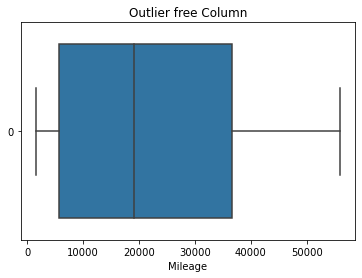

In [15]:
#We can see thorugh boxplot, we cleared outliers using flooring and capping
#mileage
sns.boxplot(data=a,orient="h")
plt.title("Outlier free Column")
plt.xlabel("Mileage")

Text(0.5, 0, 'MPG')

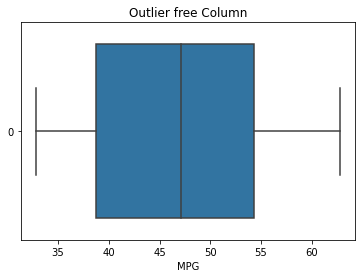

In [16]:
#mpg column
sns.boxplot(data=b,orient="h")
plt.title("Outlier free Column")
plt.xlabel("MPG")

Now, we are going to replace our old columns with corrected columns(outlier free column).

In [17]:
#X_train.drop(['mileage','mpg'],axis=1,inplace=True)
X_train['mileage'] = a
X_train['mpg'] = b
X_test['mileage'] = c
X_test['mpg'] = d
print(X_train.head())
print(X_test.head())

      brand      model  year transmission  mileage fuelType    tax   mpg  \
0    hyundi   Santa Fe  2019    Semi-Auto   4223.0   Diesel  145.0  39.8   
1  vauxhall        GTC  2015       Manual  47870.0   Diesel  125.0  60.1   
2      audi        RS4  2019    Automatic   5151.0   Petrol  145.0  32.8   
3        vw   Scirocco  2016    Automatic  20423.0   Diesel   30.0  57.6   
4     skoda      Scala  2020    Semi-Auto   3569.0   Petrol  145.0  47.1   

   engineSize  
0         2.2  
1         2.0  
2         2.9  
3         2.0  
4         1.0  
   brand       model  year transmission  mileage fuelType    tax   mpg  \
0   merc   GLS Class  2017    Automatic  12046.0   Diesel  150.0  37.2   
1     vw      Amarok  2017    Automatic  37683.0   Diesel  260.0  36.2   
2   merc   GLS Class  2019    Automatic  10000.0   Diesel  145.0  34.0   
3  skoda       Scala  2019       Manual   3257.0   Petrol  145.0  49.6   
4   audi         RS6  2015    Semi-Auto  20982.0   Petrol  325.0  32.8   

  

Now our dataset is outlier free. 

# Converting Categorical Features

We need to convert categorical column to dummy variables.

In [18]:
#creating dummy variable for fueltype 
fueltype = pd.get_dummies(X_train['fuelType'],drop_first=True)
fueltype1 = pd.get_dummies(X_test['fuelType'],drop_first=True)
fueltype1

,Electric,Hybrid,Other,Petrol
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2667,0,0,0,1
2668,0,0,0,0
2669,0,0,0,1
2670,0,0,0,1


In [19]:
#creating dummy variable for transmission 
transmission = pd.get_dummies(X_train['transmission'],drop_first=True)
transmission = transmission.rename(columns = {'Other' : 'Other1'},inplace=False)
transmission1 = pd.get_dummies(X_test['transmission'],drop_first=True)
transmission1 = transmission1.rename(columns = {'Other' : 'Other1'},inplace=False)
transmission1
#since our dataset had 2 similiared named columns so we will change its name

,Manual,Other1,Semi-Auto
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,1
...,...,...,...
2667,0,0,1
2668,0,0,0
2669,1,0,0
2670,0,0,0


In [20]:
#creating dummy variable for car brands
brand = pd.get_dummies(X_train['brand'],drop_first=True)
brand1 = pd.get_dummies(X_test['brand'],drop_first=True)
brand1.head()

,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0


In [21]:
#dropping the categirocal data to replacing it with dummy variables
X_train.drop(['transmission','fuelType','brand'],axis=1,inplace=True)
X_test.drop(['transmission','fuelType','brand'],axis=1,inplace=True)
X_test.head()

,model,year,mileage,tax,mpg,engineSize
0,GLS Class,2017,12046.0,150.0,37.2,3.0
1,Amarok,2017,37683.0,260.0,36.2,3.0
2,GLS Class,2019,10000.0,145.0,34.0,3.0
3,Scala,2019,3257.0,145.0,49.6,1.0
4,RS6,2015,20982.0,325.0,32.8,4.0


In [22]:
X_train = pd.concat([X_train,transmission,fueltype,brand],axis=1)
X_test = pd.concat([X_test,transmission1,fueltype1,brand1],axis=1)
X_test.head()

,model,year,mileage,tax,mpg,engineSize,Manual,Other1,Semi-Auto,Electric,...,Other,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,GLS Class,2017,12046.0,150.0,37.2,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Amarok,2017,37683.0,260.0,36.2,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,GLS Class,2019,10000.0,145.0,34.0,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Scala,2019,3257.0,145.0,49.6,1.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,RS6,2015,20982.0,325.0,32.8,4.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Feature Scaling 

We are using Normalization or Standzrdization method to scale our dataset.

In [23]:
from sklearn.preprocessing import MinMaxScaler # Normalization rescales value to 0 to 1 
from sklearn.preprocessing import StandardScaler # Standarization rescales value in such a way that its mean will be 0 
#and standard deviation will be 1

In [24]:
#scale = MinMaxScaler()
scale = StandardScaler()

In [25]:
X_train_scaled=scale.fit_transform(X_train[['mileage','mpg','engineSize','tax']])
X_test_scaled=scale.fit_transform(X_test[['mileage','mpg','engineSize','tax']])
X_train_scaled

array([[-1.00634073, -0.746057  ,  0.09581413, -0.08899343],
       [ 1.35728737,  1.34210125, -0.15757862, -0.33172502],
       [-0.95608649, -1.46611157,  0.98268877, -0.08899343],
       ...,
       [ 1.79755893,  1.34210125, -0.15757862, -1.4847001 ],
       [ 0.39769129,  1.61983659,  1.10938515, -0.08899343],
       [ 0.94355633,  0.97178747,  1.10938515, -0.02831053]])

In [26]:
X_train[['mileage','mpg','engineSize','tax']]=X_train_scaled
X_test[['mileage','mpg','engineSize','tax']]=X_test_scaled
X_test

,model,year,mileage,tax,mpg,engineSize,Manual,Other1,Semi-Auto,Electric,...,Other,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw
0,GLS Class,2017,-0.588626,-0.040403,-0.973920,1.125503,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Amarok,2017,0.804771,1.322207,-1.076786,1.125503,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,GLS Class,2019,-0.699829,-0.102339,-1.303090,1.125503,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Scala,2019,-1.066318,-0.102339,0.301613,-1.477131,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,RS6,2015,-0.102946,2.127386,-1.426529,2.426819,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,A7,2015,-0.096532,2.127386,-1.426529,2.426819,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2668,CLS Class,2015,1.860784,0.083471,0.579350,1.125503,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2669,Puma,2020,-1.019902,-0.102339,0.383906,-1.477131,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2670,CLA Class,2016,0.154896,0.578966,-0.531598,-0.175814,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


#### Now our dataset is ready for training.

In [27]:
x=pd.concat([X_train,y_train],axis=1)
x.head()

,model,year,mileage,tax,mpg,engineSize,Manual,Other1,Semi-Auto,Electric,...,Petrol,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw,price
0,Santa Fe,2019,-1.006341,-0.088993,-0.746057,0.095814,0,0,1,0,...,0,0,0,1,0,0,0,0,0,31995
1,GTC,2015,1.357287,-0.331725,1.342101,-0.157579,1,0,0,0,...,0,0,0,0,0,0,0,1,0,7700
2,RS4,2019,-0.956086,-0.088993,-1.466112,0.982689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,58990
3,Scirocco,2016,-0.129058,-1.484700,1.084939,-0.157579,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12999
4,Scala,2020,-1.041757,-0.088993,0.004857,-1.424542,0,0,1,0,...,1,0,0,0,0,1,0,0,0,16990


In [28]:
x.columns

Index(['model', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'Manual',
       'Other1', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol', 'bmw',
       'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw', 'price'],
      dtype='object')

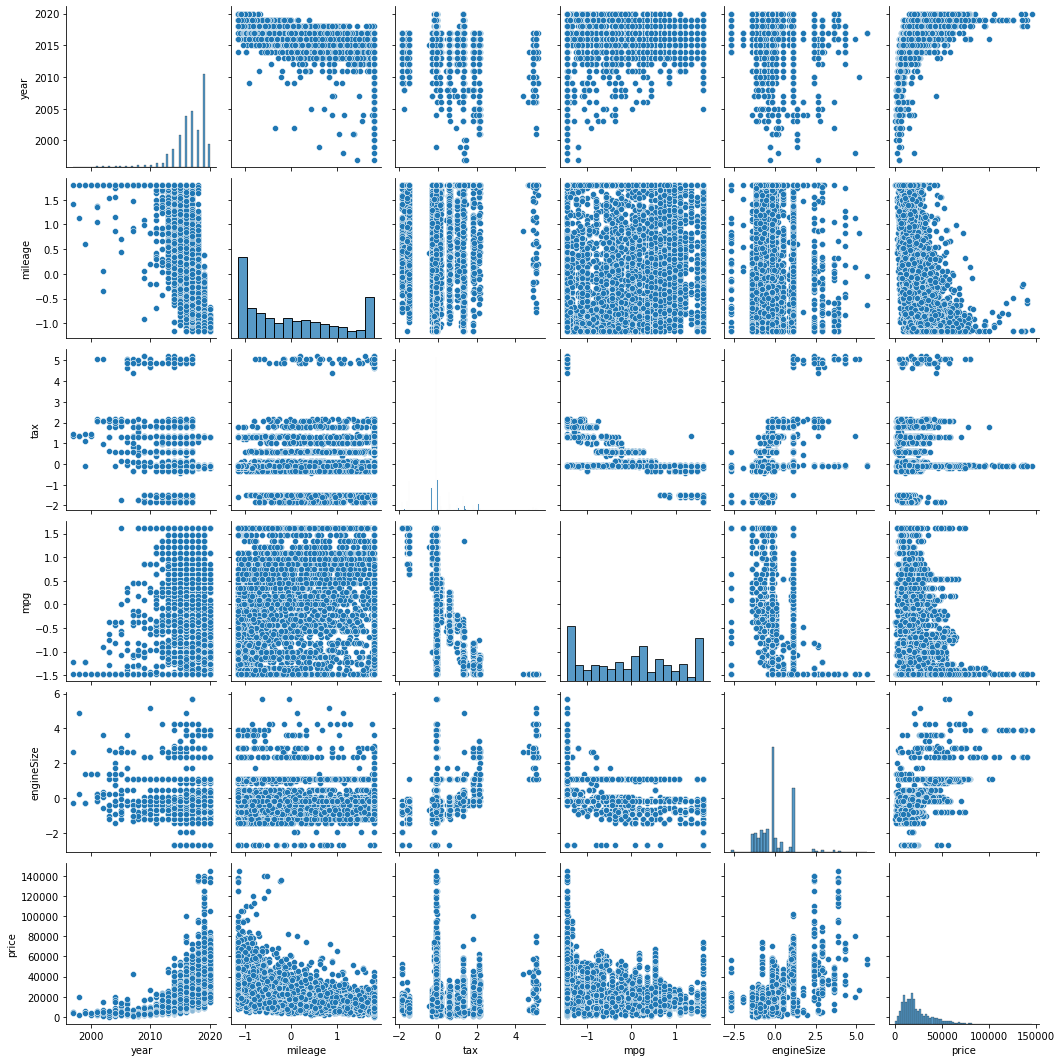

In [29]:
#plotting pairplot
sns.pairplot(x[['year', 'mileage', 'tax', 'mpg', 'engineSize','price']])

<AxesSubplot:>

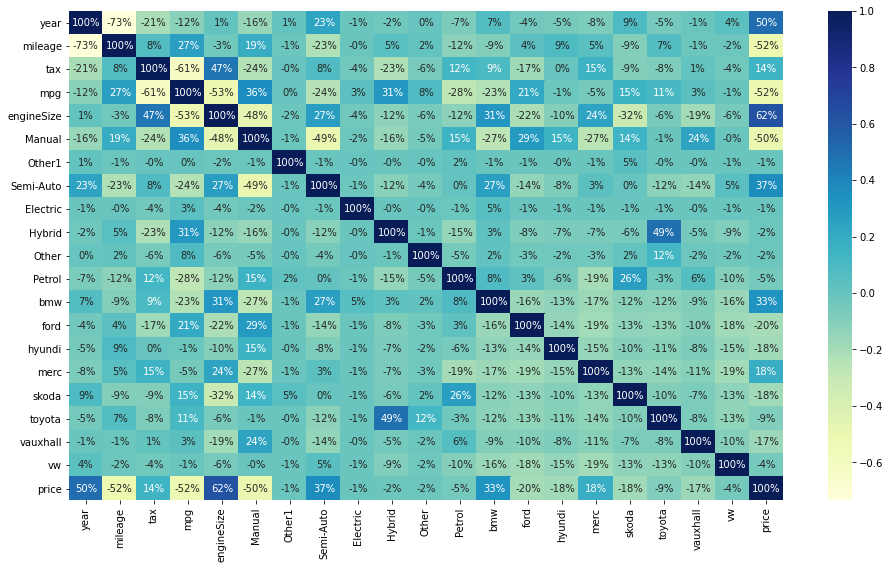

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(x[['year', 'mileage', 'tax', 'mpg', 'engineSize',
       'Manual', 'Other1', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol', 'bmw',
       'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw',
       'price']].corr(),annot=True, fmt=".0%", cmap="YlGnBu")

Lets plot few charts to get the exact relation of attributes with price.

<AxesSubplot:xlabel='year', ylabel='price'>

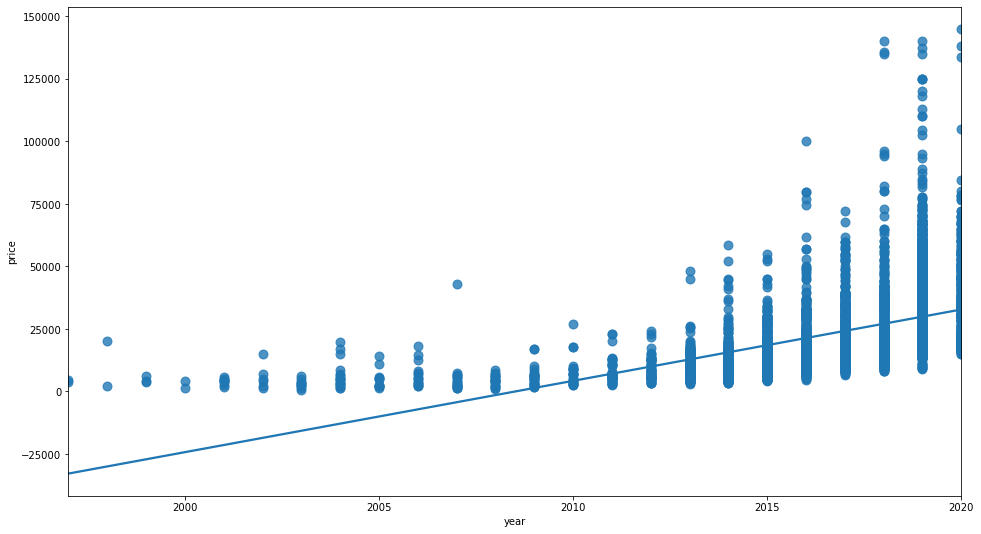

In [31]:
plt.figure(figsize=(16,9))
sns.regplot(x="year", y="price", data=x, ci = None, scatter_kws={"s": 80})

<AxesSubplot:xlabel='mileage', ylabel='price'>

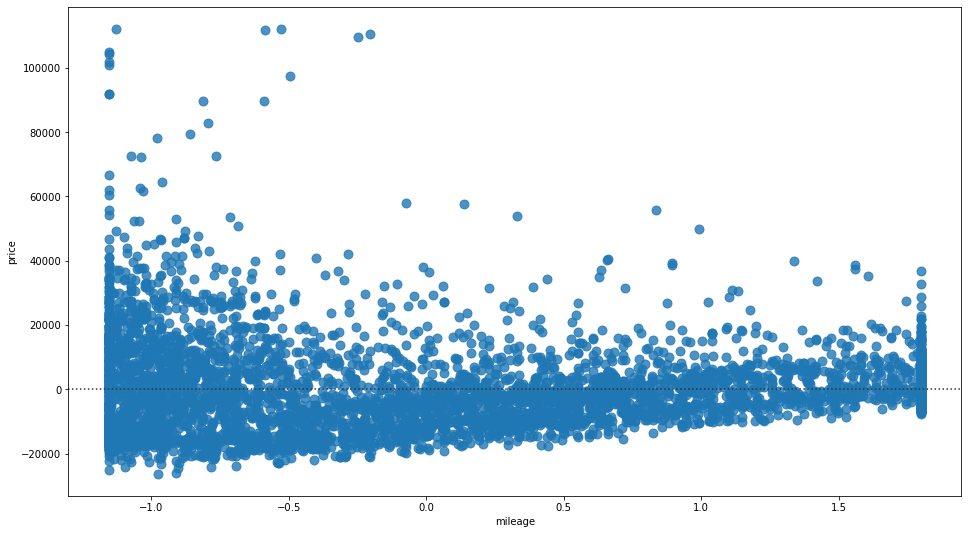

In [32]:
plt.figure(figsize=(16,9))
sns.residplot(x="mileage", y="price",data=x, scatter_kws={"s": 80})

<Figure size 720x720 with 0 Axes>

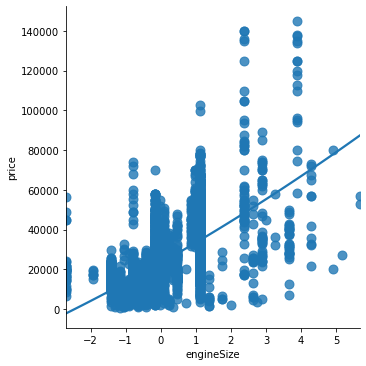

In [33]:
plt.figure(figsize=(10,10))
sns.lmplot(x="engineSize", y="price", data=x,
           order=2, ci=None, scatter_kws={"s": 80})

#### From above plots we can conclude that,
1. Our data is non-linear and not normally distributed.
2. Hence, we get that simple regression model is not apporpriate for our prediction.

# Training and Predicting

Though we know that linear regression is not appropriate for our dataset but still for comparing purpose we are going to use it.

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [35]:
X_train1=X_train.drop('model',axis=1)
X_test1=X_test.drop('model',axis=1)

In [36]:
#Linear Regression
reg = LinearRegression().fit(X_train1, y_train)

predict = reg.predict(X_test1)
print(predict)
print()

lr_r2_score= round(r2_score(y_test,predict),4)
lr_mape = round(mape(y_test,predict),4)
lr_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",lr_r2_score)
print("Mean Absolute Percentage Error :",lr_mape)
print("Root Mean Squared Error :",lr_rmse)

[[ 42592.62789863]
 [ 27803.1404479 ]
 [ 47763.18593382]
 ...
 [ 17273.28830426]
 [ 24860.29465577]
 [-11917.95645749]]

r2 score : 0.7546
Mean Absolute Percentage Error : 0.3156
Root Mean Squared Error : 8222.87


In [37]:
#Decision Tree Regression
reg = DecisionTreeRegressor(max_depth=10).fit(X_train1, y_train)

predict = reg.predict(X_test1)
print(predict)
print()

dt_r2_score= round(r2_score(y_test,predict),4)
dt_mape = round(mape(y_test,predict),4)
dt_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",dt_r2_score)
print("Mean Absolute Percentage Error :",dt_mape)
print("Root Mean Squared Error :",dt_rmse)

[37821.6969697  23392.5        48118.35294118 ... 21346.2
 29728.5         4133.80952381]

r2 score : 0.8912
Mean Absolute Percentage Error : 0.1512
Root Mean Squared Error : 5474.25


In [38]:
#RandomForest Regression
reg = RandomForestRegressor(max_depth=35).fit(X_train1,y_train)

predict = reg.predict(X_test1)
print(predict)
print()

rf_r2_score= round(r2_score(y_test,predict),4)
rf_mape = round(mape(y_test,predict),4)
rf_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",rf_r2_score)
print("Mean Absolute Percentage Error :",rf_mape)
print("Root Mean Squared Error :",rf_rmse)

<ipython-input-38-bf2f40780d80>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg = RandomForestRegressor(max_depth=35).fit(X_train1,y_train)


[39208.17       23699.94       59939.89       ... 20831.94
 21382.73        4268.54583333]

r2 score : 0.9294
Mean Absolute Percentage Error : 0.1153
Root Mean Squared Error : 4408.58


In [39]:
#K-NN Regression
reg = KNeighborsRegressor(n_neighbors=5).fit(X_train1, y_train)

knn_predict = reg.predict(X_test1)
print(knn_predict)
print()

knn_r2_score= round(r2_score(y_test,knn_predict),4)
knn_mape = round(mape(y_test,knn_predict),4)
knn_rmse=round(mse(y_test,knn_predict,squared=False),2)
print("r2 score :",knn_r2_score)
print("Mean Absolute Percentage Error :",knn_mape)
print("Root Mean Squared Error :",knn_rmse)

[[39813.8]
 [24955.6]
 [53797.6]
 ...
 [21189.2]
 [26862.8]
 [ 6854. ]]

r2 score : 0.9153
Mean Absolute Percentage Error : 0.118
Root Mean Squared Error : 4831.6


In [40]:
#Ridge Regression
reg = linear_model.Ridge().fit(X_train1, y_train)

predict = reg.predict(X_test1)
print(predict)
print()

ridge_r2_score= round(r2_score(y_test,predict),4)
ridge_mape = round(mape(y_test,predict),4)
ridge_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",ridge_r2_score)
print("Mean Absolute Percentage Error :",ridge_mape)
print("Root Mean Squared Error :",ridge_rmse)

[[ 42619.97368277]
 [ 27866.35570796]
 [ 47784.54294925]
 ...
 [ 17236.21030226]
 [ 24859.69883381]
 [-11844.06716076]]

r2 score : 0.7544
Mean Absolute Percentage Error : 0.3154
Root Mean Squared Error : 8225.48


In [41]:
#lasso Regression
reg = linear_model.Lasso().fit(X_train1,y_train)

predict = reg.predict(X_test1)
print(predict)
print()

lasso_r2_score= round(r2_score(y_test,predict),4)
lasso_mape = round(mape(y_test,predict),4)
lasso_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",lasso_r2_score)
print("Mean Absolute Percentage Error :",lasso_mape)
print("Root Mean Squared Error :",lasso_rmse)

[ 42609.03059604  27838.33813337  47776.03087194 ...  17260.30631629
  24876.55686084 -11880.61646683]

r2 score : 0.7544
Mean Absolute Percentage Error : 0.3156
Root Mean Squared Error : 8224.72


In [42]:
#AdaBoost Regression
reg = AdaBoostRegressor().fit(X_train1,y_train)

predict = reg.predict(X_test1)
print(predict)
print()

ada_r2_score= round(r2_score(y_test,predict),4)
ada_mape = round(mape(y_test,predict),4)
ada_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",ada_r2_score)
print("Mean Absolute Percentage Error :",ada_mape)
print("Root Mean Squared Error :",ada_rmse)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[39672.42572741 32235.47991543 48160.80251142 ... 27727.09845032
 24650.23582996 17109.7345679 ]

r2 score : 0.5804
Mean Absolute Percentage Error : 0.7156
Root Mean Squared Error : 10751.97


In [43]:
#XGBoost Regression

reg = XGBRegressor().fit(X_train1,y_train)

predict = reg.predict(X_test1)
print(predict)
print()

xgb_r2_score= round(r2_score(y_test,predict),4)
xgb_mape = round(mape(y_test,predict),4)
xgb_rmse=round(mse(y_test,predict,squared=False),2)
print("r2 score :",xgb_r2_score)
print("Mean Absolute Percentage Error :",xgb_mape)
print("Root Mean Squared Error :",xgb_rmse)

[43531.59   24926.66   62627.62   ... 20278.611  23583.482   3178.4158]

r2 score : 0.9229
Mean Absolute Percentage Error : 0.1235
Root Mean Squared Error : 4610.09


In [44]:
model_results = pd.DataFrame({'Model':['LinearRegression','DecicisonTree','RandomForest','KNeighborsRegressor',
                                       'RidgeRegression','LassoRegression','AdaBoostRegressor','XGBoostRegressor'],
                            'r2_score':[lr_r2_score,dt_r2_score,rf_r2_score,knn_r2_score,ridge_r2_score,lasso_r2_score,ada_r2_score,
                                        xgb_r2_score],
                            'MAPE' : [lr_mape,dt_mape,rf_mape,knn_mape,ridge_mape,lasso_mape,ada_mape,xgb_mape],
                             'RMSE' : [lr_rmse,dt_rmse,rf_rmse,knn_rmse,ridge_rmse,lasso_rmse,ada_rmse,xgb_rmse]})
model_results

,Model,r2_score,MAPE,RMSE
0,LinearRegression,0.7546,0.3156,8222.87
1,DecicisonTree,0.8912,0.1512,5474.25
2,RandomForest,0.9294,0.1153,4408.58
3,KNeighborsRegressor,0.9153,0.1180,4831.60
4,RidgeRegression,0.7544,0.3154,8225.48
5,LassoRegression,0.7544,0.3156,8224.72
6,AdaBoostRegressor,0.5804,0.7156,10751.97
7,XGBoostRegressor,0.9229,0.1235,4610.09


# Plotting observations

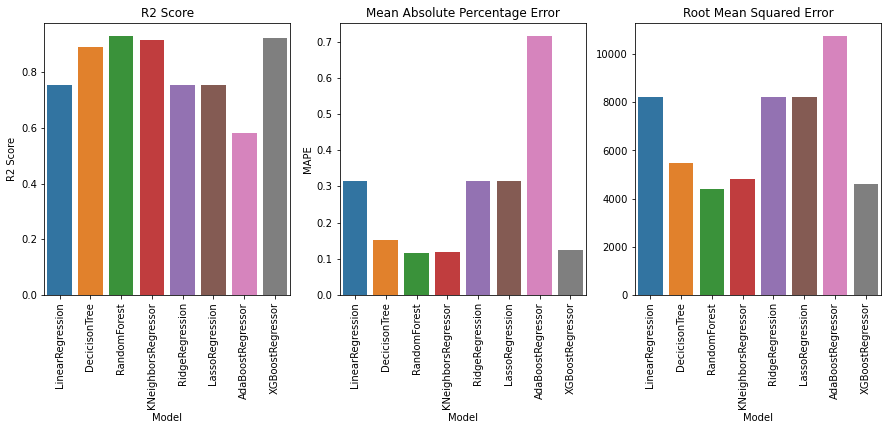

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(data=model_results,x='Model',y='r2_score')
plt.ylabel("R2 Score")
plt.title("R2 Score")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(data=model_results,x='Model',y='MAPE')
plt.ylabel("MAPE")
plt.title("Mean Absolute Percentage Error")
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(data=model_results,x='Model',y='RMSE')
plt.ylabel("")
plt.title("Root Mean Squared Error")
plt.xticks(rotation=90)

plt.show()

### From above observation, 
We can say that **RandomForest** and **XGBoostRegressor** are best model for our dataset since, it has **low error** as compare to other models and **r2_score** is also better for these models.